Suppose $x(t)$ is a stochastic signal whose ensemble average $\bar x(t)$ strictly increases over time, e.g. the center of a propagating wave, or the position of a car unable to reverse. In neuroscience it could be the location in a songbird song.

We write this as

$\tau \dot x = [f(x) + \eta]_+$

where $f(x) \geq 0$ and $\eta$ is noise.

Because of this noise, different samples of $x(t)$ will diverge from one another over time, regardless of our choice of $f$.

Given a target sequence $\bar x(t)$ that is solution to $\tau \dot x = f(x)$, our goal is to construct a scalar-valued but potentially space-dependent control signal $c(x, t) = a(x)b(t)$ such that when $x(t)$ is generated by

$\tau \dot x = [f(x) + \eta + c(x, t)]_+$

then (1) the divergence from the target over a time $T$:

$$\int_0^T[x(t) - \bar x(t)]^2dt$$

is minimized, and ideally (2) 

$$\lim\limits_{T\rightarrow \infty} \frac{1}{T}\int_0^T[x(t) - \bar x(t)]^2dt < C$$

i.e. the deviation from the target is bounded.

We first note that $c(x,t) = a(x)$ i.e. not a function of $t$ does not work, since this can then be absorbed into $f$. Nor does $c(x,t) = b(t)$ work, since this will not be able to cancel the fluctuations given by stochastic $\eta$. How could $c(x,t) = a(x)b(t)$ overcome these?

To gain intuition we first consider $\tau = 1$ and constant $f(x) = d$, i.e $\dot x = [d + \eta]_+$ where $\eta$ is Gaussian white noise. We plot $\bar x(t)$ below and a few instantiations of $x(t)$ and their differences to $\bar x(t)$.

/home/rkp/miniconda3/envs/sci/lib/python3.5/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


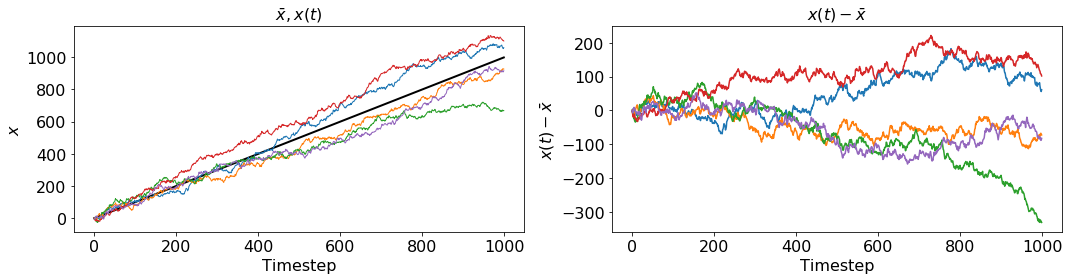

In [32]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

from disp import set_font_size


dt = 1.
T = 1000
noise_std = 5
d = 1.
n_trl = 5
t = np.arange(0, T, dt)

x_bar = d*t

xs = []

for tr_ctr in range(n_trl):
    x = np.nan*np.zeros(len(t))
    x[0] = 0
    for t_ctr in range(1, len(t)):
        tmp = d + np.random.randn()*noise_std
        dx = tmp*dt  # np.maximum(tmp, 0)*dt
        x[t_ctr] = x[t_ctr-1] + dx
    xs.append(x.copy())
        
fig, axs = plt.subplots(1, 2, figsize=(15, 4), tight_layout=True)
axs[0].plot(t, x_bar, c='k', lw=2)
axs[0].plot(t, np.transpose(xs), lw=1)
axs[1].plot(t, (np.array(xs) - x_bar).T)

axs[0].set_title(r'$\bar x, x(t)$')
axs[0].set_ylabel(r'$x$')
axs[1].set_title(r'$x(t) - \bar x$')
axs[1].set_ylabel(r'$x(t) - \bar x$')

for ax in axs:
    ax.set_xlabel('Timestep')
    set_font_size(ax, 16)

Thus, $x(t)$ generally diverges from $\bar x$ and other $x(t)$ over time.

How can we correct this with a proper choice of $c(x, t) = a(x)b(t)$? We have seen that if this is possible it must require both $a(x)$ and $b(t)$ to not be constant.

Suppose $b(t)$ is zero everywhere but equal to $b^* > 0$ between timestep 500. Then let $a(x) = 500-x$.